# Supermarket sales analysis

The food retail market is extremely competitive. Thus, having insights into consumer behavior can help businesses meet customer objectives and turn them to loyal customers. Due to this reason, the aim of this project is to find out ways to boost customer loyalty, to lead higher sales and a strong brand.

## Data Exploration and Preprocessing

The dataset used in this analysis is a Supermarket historical sales over 3 months from Jan-March 2019 from 3 different branches including. The dataset consists of 17 variables, such as Invoice ID, City, Customer type, Gender, Product line, Total, Date, Time, Payment, Gross income, Rating etc. The data set did not require extensive cleaning; there were no missing values and no duplicated values. 

In [32]:
import pandas as pd

In [33]:
sales = pd.read_csv("/Users/panunyakhemcharoen/Downloads/supermarket.csv")

In [34]:
# Data Exploration and Prepossessing 
## Overview of dataset
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
sales.duplicated().sum()

0

However, I decided to drop some variables including Invoice ID, City, and Gross margin percentage, because Invoice ID is meaningless, while City is redundant with Branch and Gross margin percentage is constant value. Moreover, I created two new variables: Day of week and Time, as part of visualization. Day of week is to display which day customers are likely to buy most, while Time is to represent which time of the day is the busiest.

In [35]:
sales.drop(['Invoice ID','City','gross margin percentage'],axis = 'columns',inplace = True)
sales.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [12]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['day_of_week'] = sales['Date'].dt.day_name()
sales['day_of_week']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: day_of_week, Length: 1000, dtype: object

In [13]:
sales[["Time", "mins"]] = sales["Time"].str.split(":", expand=True)
sales["Time"]

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Time, Length: 1000, dtype: object

Apart from checking missing values and duplicated values, removing, creating two new variables as part of visualization, I summarized the total amount of sales and gross income using the groupby function, because Supermarket might be interested in a general overview of the sales at each branch.

In [9]:
sales.groupby(['Branch']).sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Branch,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,5057.1605,2389.2
B,18478.88,1820,5057.0320,106197.6720,101140.64,5057.0320,2263.6
C,18567.76,1831,5265.1765,110568.7065,105303.53,5265.1765,2319.9


As we can see Branch C is the most profitable. The total sales amount of this branch and gross income are slightly higher than the other branches.

# Data Visualization

After considering, Customer type, Gender, Product line, Total, Date, Time, Payment, Gross income and Rating seem to be important to my problem motivation. Thus, I chose to create visualization out of these variables. The first visualization will help Supermarket to see what is the spending pattern of females and males and in which category they spend a lot.

In [23]:
import seaborn as sns

Text(0, 0.5, 'Product Line')

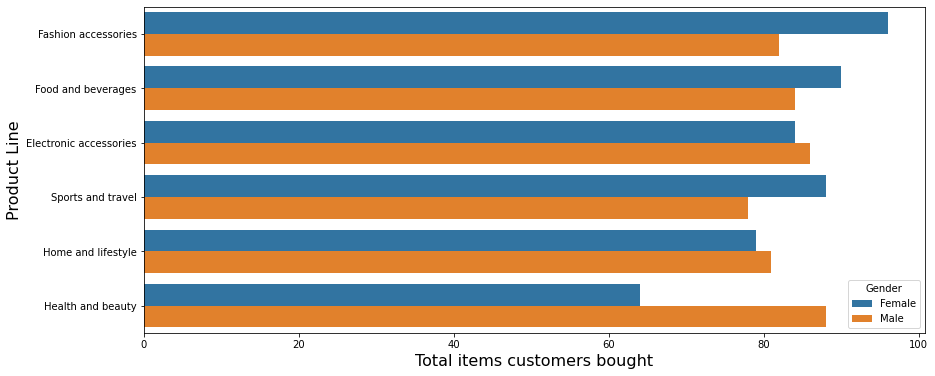

In [24]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product line', hue = "Gender", data=sales, order = sales['Product line'].value_counts().index)
ax.set_xlabel(xlabel = "Total items customers bought", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

It is interesting to see that males spend most in the health and beauty. Females spend most in the fashion accessories. Females also spend more in the sports and travel.

The second visualization will help Supermarket to see if there is any particular day of the week that the sales is higher.

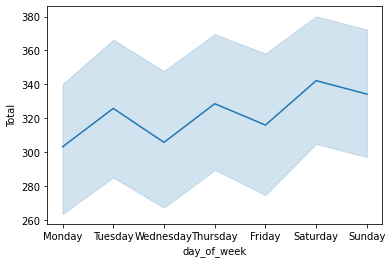

In [25]:
sales['day_of_week'] = pd.Categorical(sales['day_of_week'],
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                   ordered=True)
ax = sns.lineplot(x = "day_of_week", y = "Total", data = sales,)

Sales is highest on Saturday. Interestingly, Thursday is the second close, followed by Tuesday. Monday is the lowest in sales, probably because it is start of the working week.

The third visualization helps Supermarket know which time of the day is the busiest.

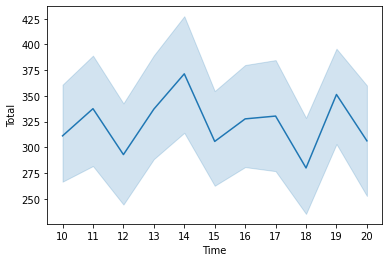

In [26]:
ax = sns.lineplot(x = "Time", y = "Total", data = sales)

It is obvious that sales 2PM is busiest, followed by 7PM. 

The next visualization helps Supermarket see average rating each branch received from customers.

In [14]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


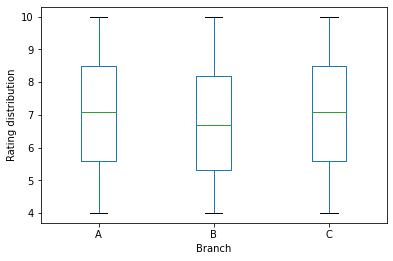

In [15]:
boxplot = sales.boxplot(column=['Rating'],by="Branch", grid= False)
plt.title('')
plt.suptitle('')
boxplot.set_ylabel("Rating distribution");
boxplot.plot()
plt.show()

Branch A and C have slightly higher rating than branch B.

# Conclusion

- Supermarket should focus on health and beauty category for men, and fashion accessories category as well as sports and travel category for female. 
- Sports and travel category is the second most profitable categories, so Supermarket should probably invest more. 
- Supermarket should promote sales on Sunday, Thursday and Tuesday in the afternoon at 2PM and 7PM because they appear to be busiest. 
- Supermarket improve the service at branch B, because it received the least rating from customers in accordance with gross income and total sales of branch B. It appears that branch B has the least total sales and gross income compared to other branches.